# **Functional Programming in Python**
---
<img src="Imperial_logo.png" align = "left" width=300>
 <br><br>
 
- Copyright (c) Antoine Jacquier, 2024. All rights reserved

- Author: Antoine Jacquier <a.jacquier@imperial.ac.uk>

- Platform: Tested on Windows 10 with Python 3.9

In [20]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image
import requests
from io import BytesIO

import pandas as pd
import time
from IPython.display import display, HTML

**Imperative Programming** is "traditional programming", that is the style of programming used in C, C++, Java, C#...
There, the programmer tells the computer what to do, and the structure is dictated by control statements, looping constructs and assignments. 

**Functional Programming** however, aims to describe the solution of the program, rather than the way it should be done.

FP is also easier to debug, as each function can be thought as an independent debug unit.

<img src="Programming_paradigms.svg" align = "left" width=1000>


*Source:* https://en.wikipedia.org/wiki/Programming_paradigm

## Introduction: Characterisation of Python functions

### Referentially Transparency

An operation is said to be **Referentially Transparent** (RT) if it can be replaced with its
corresponding value, without changing the program's behaviour, for a given set of
parameters. 

The function `incrementRT` below is RT as it always returns the same values for the same input:

In [21]:
def incrementRT(num):
    return num + 1

print("Output: ", incrementRT(5))
print("Output: ", incrementRT(5))

Output:  6
Output:  6


The following function, `incrementNotRT`, however, is not, as the output changes because of the global variable:

In [22]:
amount = 1
def incrementNotRT(num):
    return num + amount

print("Output: ", incrementNotRT(5))

amount = 2
print("Output: ", incrementNotRT(5))

Output:  6
Output:  7


**Examples:**
- A function that returns the current time is clearly not RT.
- A function that returns a sample from a distribution  is clearly not RT.

### Side effects

A function should not have any side effects, i.e. should  base its operations purely on the values it receives and its only impact should be the result returned. Any hidden side effects make software harder to maintain. Many functions, however, do have side effects, for example when it updates a database.
We call a function **PURE** if it does not have side effects.

#### Immutability

Python offers immutable data types, in particular `tuple`, to be contrasted with standard lists.

In [23]:
mutable = ['Jack', 10, [4, 5]]
immutable = ('Jack', 10, [4, 5])

# Reading from data types are essentially the same:
print("mutable is of type ", type(mutable), mutable[2])    # [4, 5]
print("immutable is of type ", type(immutable), immutable[2])  # [4, 5]

mutable is of type  <class 'list'> [4, 5]
immutable is of type  <class 'tuple'> [4, 5]


In [24]:
# Tuple items cannot be modified
mutable[1] = 15
immutable[1] = 15 ## Generates an error

TypeError: 'tuple' object does not support item assignment

In [ ]:
mutable[2] = [4, 5, 3]
mutable

**Exercise**

At HSBC,  you need to construct a database for all clients' accounts.

How would you write (as a list or a tuple) it, given that an account has the following attributes (for each attribute, indicate its type):

- Bank account number
- Bank account holder's name
- Transactions (with the corresponding date)


## Higher-order functions

A higher-order function is a function that takes other functions (or actions) as arguments. One may think of it as a convolution function.

In [25]:
def hof_write_repeat(message, n, action):
    for i in range(n):
        action(message)

hof_write_repeat('Hello', 3, print)

Hello
Hello
Hello


In [26]:
import logging
## Logging allows you to track events occurring when something is running
# Log the output as an error instead
hof_write_repeat('There is an error here', 1, logging.error)

ERROR:root:There is an error here


In [27]:
logging.error

<function logging.error(msg, *args, **kwargs)>

In [28]:
def hof_add(increment):
    # Create a function that loops and adds the increment
    def add_increment(listOfNumbers):
        return [l + increment for l in listOfNumbers]
    return add_increment

add5 = hof_add(5)

print("add5 has type ", type(add5))
print(add5([23, 88]))

add10 = hof_add(10)
print(add10([23, 88]))

add5 has type  <class 'function'>
[28, 93]
[33, 98]


## lambda functions 

A `lambda` function is an anonymous function. 
They act like standard functions, but are created withouth the `def` keyword and without a name.
Their key attributes are 

- they can take any number of arguments;
- they can return function objects;
- they only contain one single expression.


In [29]:
def prod(x,y):
    return x*y

In [30]:
product = lambda x, y : x * y
product(2, 3)

6

We can write a multiplication table, similarly to above, using `lambda` functions:

In [31]:
def hof_product(multiplier):
    return lambda x: x * multiplier

multTable = hof_product(3)
print([multTable(i) for i in range(10)])

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]


**WARNING: READABILITY, CLARITY, SIMPLICITY**

**Exercise:**
Rewrite the higher-order function `hof_add` above using `lambda` functions.

## Built-in higher-order functions

Python has several higher-order functions already built in. Note that they always return an iterator.

### The `map` function

It allows us to apply a function to every element in an iterable object.

In [32]:
names = ['Jingtong', 'Dominic', 'Pablo', 'Zhenyi', 'Lana', 'Camille']

greetingPhrase = "Hello"

messages = [greetingPhrase + " "  + n for n in names]

print(messages)

['Hello Jingtong', 'Hello Dominic', 'Hello Pablo', 'Hello Zhenyi', 'Hello Lana', 'Hello Camille']


In [33]:
greeted_names = map(lambda x: greetingPhrase + " " + x, names)

print(greeted_names, type(greeted_names))

<map object at 0x000001E83DE8BA30> <class 'map'>


In [34]:
list(greeted_names)

['Hello Jingtong',
 'Hello Dominic',
 'Hello Pablo',
 'Hello Zhenyi',
 'Hello Lana',
 'Hello Camille']

In [35]:
for name in list(greeted_names):
    print(name)

???? STRANGE ????
`map` is an iterator [later...]

##### Computation time?

Consider evaluating $\mathrm{e}^{-x}$ for many values of $x$.

In [36]:
xx = np.linspace(-.2, .2, 1000000)

In [37]:
%timeit yy = map(lambda x: np.exp(-x), xx)

177 ns ± 7.3 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [38]:
yy = map(lambda x: np.exp(-x), xx)

%timeit lyy = list(yy)

The slowest run took 27.67 times longer than the fastest. This could mean that an intermediate result is being cached.
1.83 µs ± 2.67 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%timeit yy2 = np.exp(-xx)

11.6 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Remark:**
*A `tuple` is also iterable, so `map` can be applied to it as well.*

**Exercise:**
*Rewrite the multiplication table above using `map` and `lambda` functions.*

In [40]:
c = 3.
xx = np.array([2, 3, 5])
mult_map = map(lambda x: x*c, xx)
list(mult_map)

[6.0, 9.0, 15.0]

### The `filter` function.

 It tests every element in an iterable object with a function that returns True or False, keeping the former only.

In [41]:
numbers = [13, 10, 11, 17, 85]

div_by_5_map = map(lambda num: num % 5 == 0, numbers)

div_by_5_filter = filter(lambda num: num % 5 == 0, numbers)

In [42]:
print("map: ", type(div_by_5_map))

print("filter: ", type(div_by_5_filter))

map:  <class 'map'>
filter:  <class 'filter'>


In [43]:
# We convert the iterator into a list
print("map: ", list(div_by_5_map))
print("filter: ", list(div_by_5_filter))

map:  [False, True, False, False, True]
filter:  [10, 85]


In [44]:
print([n % 5 ==0 for n in numbers])

[False, True, False, False, True]


## `functools` functions

In [45]:
import functools

### `reduce`

`reduce` applies the principle of *folding*,, by reducing the iterable to a single value. 

Contrary to `filter` and `map`, it takes two input values.

It is useful when one needs to apply a function to an iterable and reduce it to a single cumulative value.

Let us check the formula
$$
\sum_{i=0}^{n}i = \frac{n(n+1)}{2}.
$$

In [46]:
def formula(n):
    return n*(n+1) // 2

In [47]:
n = 10
print("Formula: ", formula(n))

Formula:  55


In [48]:
myList = np.arange(n+1)

mySum = functools.reduce(lambda a, b : a+b, myList)

print("The sum is equal to", mySum) 

The sum is equal to 55


### Computation time

In [49]:
def formula(n):
    return n*(n+1) // 2

def formula_loop(n):
    res = 0
    for i in np.arange(n+1):
        res += i
    return res

def formula_sum(n):
    return sum(range(n+1))

def formula_npsum(n):
    return np.sum(np.arange(n+1))

def formula_functools(n):
    return functools.reduce(lambda a, b : a+b, np.arange(n+1))

In [50]:
myfuncs = [formula, formula_loop, formula_sum, formula_npsum, formula_functools]
nn = np.arange(10000, 1000000, 50000)

mydata_vals, mydata_time = [], []
    
for n in nn:
    dts, vals = [], []
    for f in myfuncs:
        t0 = time.time()
        fn = f(n)
        dt = time.time() - t0
        
        vals.append(n)
        dts.append(dt)
        
    mydata_vals.append(vals)
    mydata_time.append(dts)

C:\Users\ajacquie\AppData\Local\Temp\ipykernel_724\3671495906.py:2: RuntimeWarning: overflow encountered in scalar multiply
  return n*(n+1) // 2
C:\Users\ajacquie\AppData\Local\Temp\ipykernel_724\3671495906.py:7: RuntimeWarning: overflow encountered in scalar add
  res += i
C:\Users\ajacquie\AppData\Local\Temp\ipykernel_724\3671495906.py:17: RuntimeWarning: overflow encountered in scalar add
  return functools.reduce(lambda a, b : a+b, np.arange(n+1))


In [51]:
df = pd.DataFrame(mydata_vals, columns = [str(f.__name__) for f in myfuncs])
df.columns.name = '[Values]'
df.index = nn
df.index.name = "n"
display(HTML(df.to_html()))

df = pd.DataFrame(np.round(mydata_time, 3), columns = [str(f.__name__) for f in myfuncs])
df.columns.name = '[Comp time (seconds)]'
df.index = nn
df.index.name = "n"
display(HTML(df.to_html()))

[Values],formula,formula_loop,formula_sum,formula_npsum,formula_functools
n,,,,,
10000,10000,10000,10000,10000,10000
60000,60000,60000,60000,60000,60000
110000,110000,110000,110000,110000,110000
160000,160000,160000,160000,160000,160000
210000,210000,210000,210000,210000,210000
260000,260000,260000,260000,260000,260000
310000,310000,310000,310000,310000,310000
360000,360000,360000,360000,360000,360000
410000,410000,410000,410000,410000,410000


[Comp time (seconds)],formula,formula_loop,formula_sum,formula_npsum,formula_functools
n,,,,,
10000,0.0,0.001,0.000,0.000,0.002
60000,0.0,0.006,0.002,0.000,0.008
110000,0.0,0.008,0.006,0.000,0.014
160000,0.0,0.013,0.003,0.000,0.021
210000,0.0,0.016,0.000,0.000,0.032
260000,0.0,0.023,0.008,0.000,0.023
310000,0.0,0.031,0.010,0.000,0.044
360000,0.0,0.032,0.014,0.000,0.031
410000,0.0,0.040,0.021,0.000,0.050


####### Second version, with pre-computed `np.arange` (we add the letter "v" to indicate "vector")

In [52]:
def vformula(n):
    return n*(n+1) // 2

def vformula_loop(nn):
    res = 0
    for i in nn:
        res += i
    return res

def vformula_sum(nn):
    return sum(nn)

def vformula_npsum(nn):
    return np.sum(nn)

def vformula_functools(nn):
    return functools.reduce(lambda a, b : a+b, nn)

In [53]:
nn = np.arange(100000, 10000000, 500000)
nn

array([ 100000,  600000, 1100000, 1600000, 2100000, 2600000, 3100000,
       3600000, 4100000, 4600000, 5100000, 5600000, 6100000, 6600000,
       7100000, 7600000, 8100000, 8600000, 9100000, 9600000])

In [54]:
myvfuncs = [vformula, vformula_loop, vformula_sum, vformula_npsum, vformula_functools]
nn = np.arange(100000, 10000000, 500000)

mydata_vals, mydata_time = [], []
    
for n in nn:
    nn_temp = np.arange(n+1)
    dts, vals = [], []
    for f in myvfuncs:
        t0 = time.time()
        fn = f(nn_temp)
        dt = time.time() - t0
        
        vals.append(n)
        dts.append(dt)
        
    mydata_vals.append(vals)
    mydata_time.append(dts)

C:\Users\ajacquie\AppData\Local\Temp\ipykernel_724\296023125.py:7: RuntimeWarning: overflow encountered in scalar add
  res += i
C:\Users\ajacquie\AppData\Local\Temp\ipykernel_724\296023125.py:11: RuntimeWarning: overflow encountered in scalar add
  return sum(nn)
C:\Users\ajacquie\AppData\Local\Temp\ipykernel_724\296023125.py:17: RuntimeWarning: overflow encountered in scalar add
  return functools.reduce(lambda a, b : a+b, nn)


In [55]:
df = pd.DataFrame(np.round(mydata_time, 3), columns = [str(f.__name__) for f in myvfuncs])
df.columns.name = '[Comp time (seconds)]'
df.index = nn
df.index.name = "n"
display(HTML(df.to_html()))

[Comp time (seconds)],vformula,vformula_loop,vformula_sum,vformula_npsum,vformula_functools
n,,,,,
100000,0.000,0.010,0.006,0.000,0.017
600000,0.003,0.054,0.039,0.000,0.073
1100000,0.000,0.115,0.065,0.000,0.134
1600000,0.000,0.155,0.110,0.002,0.184
2100000,0.010,0.196,0.143,0.000,0.243
2600000,0.019,0.248,0.164,0.008,0.297
3100000,0.010,0.268,0.231,0.002,0.348
3600000,0.021,0.318,0.234,0.002,0.400
4100000,0.021,0.376,0.270,0.003,0.472


Another example: computing the max

In [56]:
myMax = functools.reduce(lambda a, b : a if a > b else b,myList)
print("The maximum is equal to", myMax) 

The maximum is equal to 10


**Quote by Guido van Rossum, creator of `Python`:**

"*Use functools.reduce if you really need it; however, 99% of the time an explicit for loop is more readable.*"

### The `partial` module

One may want to use the behaviour of a function, but freezing some of its arguments.
For example

In [57]:
def add(a):
    return a + 2

add(3)

5

In [58]:
from functools import partial

def add(bb, a): ## one can only freeze the first argument
    return a + np.sum(bb)

add_new = partial(add, [2, 3, 5, 7])

add_new(4)

21

In [59]:
def printMessage(message, name): ## the first argument is frozen
    return message + " " + name

newMessage = partial(printMessage, "Hello")

newMessage("Jack")

'Hello Jack'

*Example: When using the Black-Scholes pricing function, we may want to impose a specified interest rate, that the user cannot modify.* 

$$
\mathrm{BS}(r, S_0, K, T, \sigma)
$$

BS_user = partial(BS, fixedRate)

**Exercise:**
*Rewrite the above two operations (sum and max) using `numpy` packages (not with `functools`).*

**Exercise:**
*Write the following command using `map` and `filter`:*

*`arbitrary_numbers = [num ** 3 for num in range(1, 21) if num % 3 == 0]`*

*Test on the list `numbers = [13, 10, 11, 18, 35]`*

In [60]:
## Solution:
arbitrary_numbersFilter = map(lambda num: num ** 3, filter(lambda num: num % 3 == 0, range(1, 21)))

In [61]:
list(arbitrary_numbersFilter)

[27, 216, 729, 1728, 3375, 5832]

## Iterators and Generators

An iterator is an object representing a stream of data. 

It must support a method called `__next__()` that takes no argument and returns the next element of the stream. 

At the end of the stream, `__next__()` raises the `StopIteration` exception. 

Iterators (the data) can be of finite or infinite length.

Standard objects to iterate over (called iterable objects) are lists, tuples, arrays, dictionaries.

The two fundamental methods `iter()` and `next()` are called *iterator protocols*.

In [62]:
## Example
xx = np.linspace(1., 10., 5)
print(xx, type(xx))

[ 1.    3.25  5.5   7.75 10.  ] <class 'numpy.ndarray'>


In [63]:
it = iter(xx)
print("it: ", it, type(it))

it:  <iterator object at 0x000001E83DE8BEE0> <class 'iterator'>


In [64]:
print(next(it))

1.0


The functions `min` and `max` in are built-in functions operating on iterators:

In [65]:
it = iter(xx)

print(max(it))

10.0


In [66]:
type(it)

iterator

*Of course here you could use `numpy.max` and `numpy.min` directly on the `numpy.array`.*

In [67]:
print(xx[1] in iter(xx))
print(1.2 in iter(xx))

True
False


*Warning....!*

In [68]:
it = iter(xx)
print(1.2 in it)

False


In [69]:
next(it)

StopIteration: 

### Iterators for dictionaries

Since dictionaries are iterable objects, we can also construct iterators on them.

Let us illustrate this on financial data.
We first import options data on the S&P 500 from Yahoo Finance, and create a dictionary from this `pandas` dataframe.

In [70]:
from yahoo_fin import options

chain = options.get_options_chain("spy")
calls = chain["calls"]

C:\Users\ajacquie\AppData\Local\anaconda3\Lib\site-packages\yahoo_fin\options.py:42: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(requests.get(site, headers=headers).text)


ValueError: No tables found

In [81]:
import yfinance as yf

ticker = "AMZN"
yf_ticker = yf.Ticker(ticker)

## List of maturities available
print(yf_ticker.options)
maturity_selected = yf_ticker.options[2]

('2024-11-22', '2024-11-29', '2024-12-06', '2024-12-13', '2024-12-20', '2024-12-27', '2025-01-17', '2025-02-21', '2025-03-21', '2025-04-17', '2025-06-20', '2025-07-18', '2025-08-15', '2025-09-19', '2025-12-19', '2026-01-16', '2026-06-18', '2026-12-18', '2027-01-15')


In [82]:
# get option chain for specific expiration
ticker_options = yf_ticker.option_chain(maturity_selected)
ticker_options

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice  bid  \
0   AMZN241206C00100000 2024-11-15 20:04:47+00:00   100.0     101.42  0.0   
1   AMZN241206C00105000 2024-11-08 18:41:16+00:00   105.0     104.69  0.0   
2   AMZN241206C00110000 2024-11-08 19:50:56+00:00   110.0      99.41  0.0   
3   AMZN241206C00115000 2024-11-11 17:11:22+00:00   115.0      91.83  0.0   
4   AMZN241206C00120000 2024-11-15 14:39:24+00:00   120.0      85.87  0.0   
5   AMZN241206C00125000 2024-11-13 19:07:37+00:00   125.0      89.30  0.0   
6   AMZN241206C00130000 2024-11-12 17:33:50+00:00   130.0      78.77  0.0   
7   AMZN241206C00135000 2024-11-14 14:30:00+00:00   135.0      79.68  0.0   
8   AMZN241206C00140000 2024-11-15 14:34:44+00:00   140.0      66.09  0.0   
9   AMZN241206C00145000 2024-11-15 19:10:08+00:00   145.0      56.70  0.0   
10  AMZN241206C00150000 2024-11-15 16:21:01+00:00   150.0      54.64  0.0   
11  AMZN241206C00155000 2024-11-12 15:40:04+00:00   155.0     

In [85]:
calls = ticker_options.calls
calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AMZN241206C00100000,2024-11-15 20:04:47+00:00,100.0,101.42,0.0,0.0,0.0,0.0,5.0,0.0,0.00001,True,REGULAR,USD
1,AMZN241206C00105000,2024-11-08 18:41:16+00:00,105.0,104.69,0.0,0.0,0.0,0.0,1.0,0.0,0.00001,True,REGULAR,USD
2,AMZN241206C00110000,2024-11-08 19:50:56+00:00,110.0,99.41,0.0,0.0,0.0,0.0,1.0,0.0,0.00001,True,REGULAR,USD
3,AMZN241206C00115000,2024-11-11 17:11:22+00:00,115.0,91.83,0.0,0.0,0.0,0.0,5.0,0.0,0.00001,True,REGULAR,USD
4,AMZN241206C00120000,2024-11-15 14:39:24+00:00,120.0,85.87,0.0,0.0,0.0,0.0,NaN,NaN,0.00001,True,REGULAR,USD


In [86]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   contractSymbol     38 non-null     object             
 1   lastTradeDate      38 non-null     datetime64[ns, UTC]
 2   strike             38 non-null     float64            
 3   lastPrice          38 non-null     float64            
 4   bid                36 non-null     float64            
 5   ask                38 non-null     float64            
 6   change             38 non-null     float64            
 7   percentChange      38 non-null     float64            
 8   volume             30 non-null     float64            
 9   openInterest       36 non-null     float64            
 10  impliedVolatility  38 non-null     float64            
 11  inTheMoney         38 non-null     bool               
 12  contractSize       38 non-null     object           

In [88]:
select_index = 3

keys = list(calls.keys()) ## Same as keys = calls.columns.values
print(keys)

['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask', 'change', 'percentChange', 'volume', 'openInterest', 'impliedVolatility', 'inTheMoney', 'contractSize', 'currency']


In [98]:
values = calls.iloc[select_index,:]  ## same as [calls[k][select_index] for k in keys]
print(values)
dictio = {k : v for (k,v) in zip(keys, values)}

contractSymbol             AMZN241206C00115000
lastTradeDate        2024-11-11 17:11:22+00:00
strike                                   115.0
lastPrice                                91.83
bid                                        0.0
ask                                        0.0
change                                     0.0
percentChange                              0.0
volume                                     5.0
openInterest                               0.0
impliedVolatility                      0.00001
inTheMoney                                True
contractSize                           REGULAR
currency                                   USD
Name: 3, dtype: object


In [99]:
dictio.keys()

dict_keys(['contractSymbol', 'lastTradeDate', 'strike', 'lastPrice', 'bid', 'ask', 'change', 'percentChange', 'volume', 'openInterest', 'impliedVolatility', 'inTheMoney', 'contractSize', 'currency'])

In [100]:
for k in dictio.keys():
    print(k, ": ", dictio[k])

contractSymbol :  AMZN241206C00115000
lastTradeDate :  2024-11-11 17:11:22+00:00
strike :  115.0
lastPrice :  91.83
bid :  0.0
ask :  0.0
change :  0.0
percentChange :  0.0
volume :  5.0
openInterest :  0.0
impliedVolatility :  1.0000000000000003e-05
inTheMoney :  True
contractSize :  REGULAR
currency :  USD


In [101]:
## The iterator loops over the keys of the dictionary
it = iter(dictio)

In [102]:
print(next(it))

contractSymbol


In [103]:
print(next(it))

lastTradeDate


### Generators

Generators are similar to functions, but do not destroy the local environment within a `python` function once the function has been evaluated.

In [106]:
def generate_ints(N):
    for i in range(N):
        yield i
        
## NOTE: there is no `return' command for generators

gen = generate_ints(3)
print("gen is of type ", type(it))

gen is of type  <class 'dict_keyiterator'>


In [107]:
next(gen)

0

In [108]:
next(gen)

1

In [110]:
next(gen)

StopIteration: 

You can also modify the value of an internal counter within a generator, using the send() method.

In [111]:
def counter(maximum):
    i = 0
    while i < maximum:
        val = yield i
        # If a value is provided, we change the counter
        if val is not None:
            i = val
        else:
            i += 1

In [113]:
it = counter(10)
next(it)

0

In [114]:
next(it)

1

In [115]:
next(it)

2

In [116]:
it.send(7)
next(it)

8

In [117]:
next(it)

9

The other useful methods on generators are
- throw() to raise an exception
- close() to terminate the iteration within the generator

### When to use iterators / generators?

#### Example 1: reading through a large file

In [118]:
import csv

In [135]:
def read_file():
    with open('Book1.csv', 'r') as myfile:
        r = csv.reader(myfile)
        return [row for row in r]

output_rows = read_file() 

In [139]:
def read_file_gen():
    with open('Book1.csv', 'r') as myfile:
        r = csv.reader(myfile)
        for row in r:
            yield row

output_rows_gen = read_file_gen()
#output_rows_gen_r = [row for row in read_file_gen()]

In [132]:
next(output_rows_gen)

['Jack', '3', '-0.53927136']

In [144]:
import sys

print("Memory of the generator: ", sys.getsizeof(output_rows_gen))

print("Memory of the generator: ", sys.getsizeof(output_rows))

Memory of the generator:  240
Memory of the generator:  7509944


#### Example 2: Computing over large arrays

In [157]:
N = 10000

In [158]:
list_integers = [i * i for i in range(N)]
print(type(list_integers))

%timeit sum(list_integers)

sum(list_integers)

<class 'list'>
446 µs ± 69.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


333283335000

In [159]:
def list_gen_func(N):
    for i in range(N):
        yield i*i

In [160]:
list_integers_gen_func = list_gen_func(N)

print(type(list_integers_gen_func))
%timeit sum(list_integers_gen_func)
#sum(list_integers_gen_func)

<class 'generator'>
110 ns ± 4.47 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [166]:
list_integers_gen = (i * i for i in range(N))
list_integers_gen_list = list(list_integers_gen)
print(type(list_integers_gen))

%timeit sum(list_integers_gen)
#sum(list_integers_gen)

<class 'generator'>
109 ns ± 6.46 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [167]:
print(sys.getsizeof(list_integers))
print(sys.getsizeof(list_integers_gen))
print(sys.getsizeof(list_integers_gen_list))
#print(sys.getsizeof(list_integers_gen_func))

85176
208
85176


### Built-in functions for iterators

In [168]:
## the map() function returns an iterator over a sequence
def upper(word):
    return word.upper()

listNames = ['foreign exchange', 'equities', 'rates', 'commodities']
map_uppercase = map(upper, listNames)
type(map_uppercase)

map

In [169]:
next(map_uppercase)

'FOREIGN EXCHANGE'

#### `enumerate()`

In [170]:
for i in range(len(listNames)):
    print(i, listNames[i])

0 foreign exchange
1 equities
2 rates
3 commodities


In [171]:
for name in listNames:
    print(name)

foreign exchange
equities
rates
commodities


In [176]:
## enumerate() returns 2-tuples containing counts and elements:
for x in enumerate(listNames):
    print(x)

(0, 'foreign exchange')
(1, 'equities')
(2, 'rates')
(3, 'commodities')


#### `sorted()` and `sort()`

In [183]:
import yfinance as yf
## https://www.slickcharts.com/sp500
listTickers = ['GOOGL', 'AAPL', 'MSFT', 'AMZN', 'UNH', 'TSLA', 'JNJ', 'XOM', 'JPM', 'NVDA'] 
unsortedList = []
for ticker in listTickers:
    ticker_info = yf.Ticker(ticker).info
    market_price = ticker_info['regularMarketOpen']
    unsortedList.append((ticker, market_price))

In [185]:
unsortedList

[('GOOGL', 173.89),
 ('AAPL', 225.92),
 ('MSFT', 420.25),
 ('AMZN', 206.75),
 ('UNH', 591.92),
 ('TSLA', 310.855),
 ('JNJ', 150.9),
 ('XOM', 120.4),
 ('JPM', 241.46),
 ('NVDA', 144.87)]

In [186]:
unsortedList_copy = unsortedList

In [187]:
unsortedList_copy

[('GOOGL', 173.89),
 ('AAPL', 225.92),
 ('MSFT', 420.25),
 ('AMZN', 206.75),
 ('UNH', 591.92),
 ('TSLA', 310.855),
 ('JNJ', 150.9),
 ('XOM', 120.4),
 ('JPM', 241.46),
 ('NVDA', 144.87)]

In [188]:
unsortedList_copy.sort(key=lambda x: x[1])
unsortedList_copy

[('XOM', 120.4),
 ('NVDA', 144.87),
 ('JNJ', 150.9),
 ('GOOGL', 173.89),
 ('AMZN', 206.75),
 ('AAPL', 225.92),
 ('JPM', 241.46),
 ('TSLA', 310.855),
 ('MSFT', 420.25),
 ('UNH', 591.92)]

- **Problem 1:** The list (unsortedList_copy) has been modified.

- **Problem 2:** The very original list (unsortedList) has also been modified.

In [189]:
unsortedList

[('XOM', 120.4),
 ('NVDA', 144.87),
 ('JNJ', 150.9),
 ('GOOGL', 173.89),
 ('AMZN', 206.75),
 ('AAPL', 225.92),
 ('JPM', 241.46),
 ('TSLA', 310.855),
 ('MSFT', 420.25),
 ('UNH', 591.92)]

In [190]:
unsortedList_copy = unsortedList.copy()

In [191]:
sorted(unsortedList_copy, key=lambda x: x[1])

[('XOM', 120.4),
 ('NVDA', 144.87),
 ('JNJ', 150.9),
 ('GOOGL', 173.89),
 ('AMZN', 206.75),
 ('AAPL', 225.92),
 ('JPM', 241.46),
 ('TSLA', 310.855),
 ('MSFT', 420.25),
 ('UNH', 591.92)]

In [192]:
unsortedList

[('XOM', 120.4),
 ('NVDA', 144.87),
 ('JNJ', 150.9),
 ('GOOGL', 173.89),
 ('AMZN', 206.75),
 ('AAPL', 225.92),
 ('JPM', 241.46),
 ('TSLA', 310.855),
 ('MSFT', 420.25),
 ('UNH', 591.92)]

The main difference is that the original list is unchanged when using `sorted()`.

#### `zip()`

`zip` converts multiple sequences and combines them into tuple. Here is an example creating a dictionary counting the letters in names:

In [197]:
names = ['Thomas', 'Guillem', 'Dominic', 'Chuou', 'Pablo', 'Akram', 'Xingjian', 'Zhenyi']
ll = map(len, names)
print(ll)

In [198]:
dict(zip(names, ll))

{'Thomas': 6,
 'Guillem': 7,
 'Dominic': 7,
 'Chuou': 5,
 'Pablo': 5,
 'Akram': 5,
 'Xingjian': 8,
 'Zhenyi': 6}

### A Finance example:  option pricing

The Black–Scholes model is one of the cornerstones of mathematical finance.
It assumes that the underlying stock price has the following dynamics:
$$
\frac{\mathrm{d} S_t}{S_t} = r \mathrm{d}t + \sigma \mathrm{d} W_t,
\qquad S_0 >0,
$$
for $t\geq 0$, for some constant (volatility) $\sigma>0$, and where $(W_t)_{t\geq 0}$ is a standard Brownian motion.

The value of a European Call option on $(S_t)_{t\geq 0}$ in the Black-Scholes model is given, at time $t\in [0,T]$, by
$$
C^{\mathrm{BS}}(S_0, K, T;\sigma) := \mathrm{e}^{-rT}\mathbb{E}\left[\max(S_{T} - K, 0)\right]
 = S_0\left(\mathcal{N}(d_{+}) - \mathrm{e}^{k}\mathcal{N}(d_{-})\right),
$$
where
$$
d_{\pm} = \frac{-k}{\sigma\sqrt{T}} \pm\frac{\sigma\sqrt{T}}{2}
$$
and
- $k := \log\left(K\mathrm{e}^{-rT} / S_0\right)$ is called the log forward moneyness;
- $\mathcal{N}(\cdot)$ is the cumulative distribution function of the standard normal distribution,
- $T - t$ is the time to maturity;
- $S_t$ is the spot price of the underlying asset;
- $K$ is the strike price;
- $\sigma$ is the volatility  of returns of the underlying asset.


In [199]:
from scipy.stats import norm
from scipy.optimize import bisect
import matplotlib.pyplot as plt
import numpy as np

def BlackScholesCallPrice(S, K, T, sigma, r):
    """European Call option price in the Black-Scholes model
    S: initial value for the stock price
    K: strike
    T: maturity
    r: constant risk-free rate
    """
    d1 = (np.log(S/K) + (r+.5*sigma**2)*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp (-r*T) * norm.cdf (d2)


def impliedVol(S, K, T, r, price):
    """Computes the implied volatility given a Call option price
    This is done using bisection
    
    S: initial value for the stock price
    K: strike
    T: maturity
    r: constant risk-free rate
    price: observed price
    """
    def smileMin(vol, *args):
        S, K, T, r, price = args
        return price - BlackScholesCallPrice(S, K, T, vol, r)
    vMin = 0.0001
    vMax = 3.
    return bisect(smileMin, vMin, vMax, args=(S, K, T, r, price), rtol=1e-15, full_output=False, disp=True)

In [201]:
## Example:
S, K, T, r, callput = 1., 0.9,  1., 0., 1
price = 0.1
impVol = impliedVol(S, K, T, r, price)
print("The implied volatility is equal to " + str(np.round(100*impVol, 2)) + "% for a Call option worth " + str(np.round(price, 2)))
print("Consistency check (error): ", BlackScholesCallPrice(S, K, T, impVol, r)-  price)

The implied volatility is equal to 1.4% for a Call option worth 0.1
Consistency check (error):  -2.7755575615628914e-17


Example of generated option prices and implied volatilities

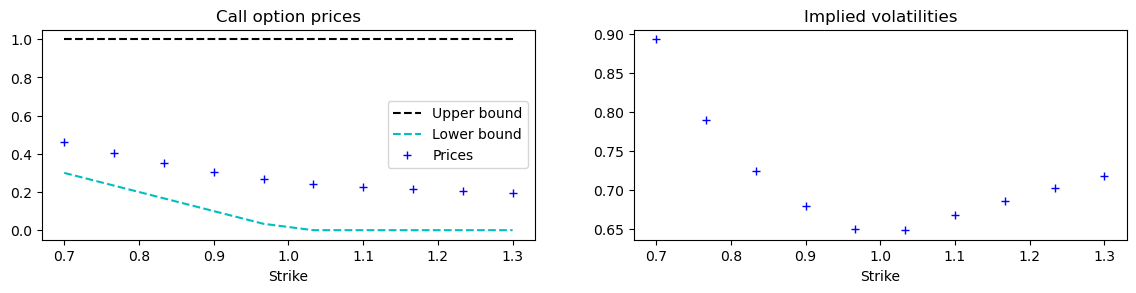

In [202]:
S, T, r, callput = 1., 1., 0., 1
nbStrikes = 10
KK = np.linspace(0.7, 1.3, nbStrikes)
prices = [0.5*np.minimum(1./(2.*K), 1)*(S+ np.maximum(S-K, 0.)) for K in KK]
ivs = [impliedVol(S, K, T, r, p) for (K,p) in zip(KK, prices)]

plt.figure(figsize=(14, 6))
plt.subplot(221)
plt.plot(KK, [S for _ in KK], 'k--', label="Upper bound")
plt.plot(KK, [np.maximum(S-K,0.) for K in KK], 'c--', label="Lower bound")
plt.plot(KK, prices, 'b+', label="Prices")
plt.legend(loc="best")
plt.xlabel("Strike")
plt.title("Call option prices")

plt.subplot(222)
plt.plot(KK, ivs, 'b+')
plt.title("Implied volatilities")
plt.xlabel("Strike")
plt.show()

Suppose now we want to be able to run the impliedVol() function for a whole range of strikes and option prices at the same time.

In [203]:
impliedVols = map(lambda K, p: impliedVol(S, K, T, r, p), KK, prices)

In [204]:
type(impliedVols)

map

In [205]:
ivs = list(impliedVols)
np.round(ivs, 2)

array([0.89, 0.79, 0.72, 0.68, 0.65, 0.65, 0.67, 0.69, 0.7 , 0.72])

In [206]:
## Note that we could have written this as a list comprehension as well:
ivs = [impliedVol(S, K, T, r, p) for (K,p) in zip(KK, prices)]

**Exercise:**

*Only returns the implied volatilities above a certain threshold.*

In [207]:
threshold = .68

ivs_filtered = list(filter(lambda x: x>threshold, ivs))
TrueFalse = list(map(lambda x: x>threshold, ivs))
KK_filtered = [K for (i,K) in enumerate(KK) if TrueFalse[i]] ## select the corresponding strikes

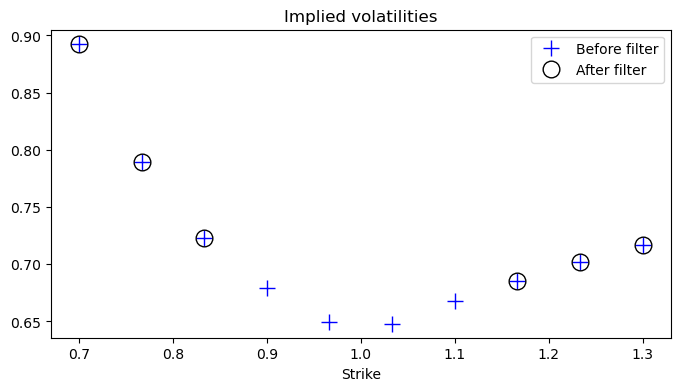

In [208]:
plt.figure(figsize=(8,4))
plt.plot(KK, ivs, 'b+', markersize=12, label="Before filter")
plt.plot(KK_filtered, ivs_filtered, 'ko', mfc='None', markersize=12, label="After filter")
plt.legend(loc="best")
plt.title("Implied volatilities")
plt.xlabel("Strike")
plt.show()

## The itertools module
The itertools module contains a number of commonly-used iterators as well as functions for combining several iterators.

We only show some basic and useful examples.

Full details available here: https://docs.python.org/3.7/library/itertools.html

In [209]:
import itertools

In [210]:
rep = itertools.repeat('abc', 5)
type(rep)

itertools.repeat

In [211]:
list(rep)

['abc', 'abc', 'abc', 'abc', 'abc']

In [212]:
list(itertools.chain(['a', 'b', 'c'], (1, 2, 3)))

['a', 'b', 'c', 1, 2, 3]

In [214]:
## Combinatorics
comb = itertools.combinations([1, 2, 3, 4, 5], 2)
print(type(comb))

combL = list(comb)

print(combL)

print("Number of elements: ", len(combL))

<class 'itertools.combinations'>
[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
Number of elements:  10


Note that the elements within each output tuple are in the same order as the original iterable input

In [215]:
perm = itertools.permutations([1, 2, 3, 4, 5], 2)
permL = list(perm)
print(permL)
print("Number of elements: ", len(permL))

[(1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4)]
Number of elements:  20


`itertools.groupby`

`groupby()` collects all the consecutive elements from the underlying iterable that have the same key value, and returns a stream of 2-tuples containing a key value and an iterator for the elements with that key.

In [216]:
ukCities = [('Edinburg', 'Scotland'), ('London', 'England'), ('Cardiff', 'Wales'),
             ('Dublin', 'Ireland'), ('Belfast', 'Northern Ireland'), ('Glasgow', 'Scotland'), 
              ('Liverpool', 'England'), ('York', 'England'), ('Bath', 'England'), ('Perth', 'Scotland'),
              ('Swansea', 'Wales'), ('Cork', 'Ireland'), ('Galway', 'Ireland'), ('Londonderry', 'Northern Ireland')]

def get_country(myList):
    return myList[1]

data = sorted(ukCities, key=lambda x: x[1])

print(data)

[('London', 'England'), ('Liverpool', 'England'), ('York', 'England'), ('Bath', 'England'), ('Dublin', 'Ireland'), ('Cork', 'Ireland'), ('Galway', 'Ireland'), ('Belfast', 'Northern Ireland'), ('Londonderry', 'Northern Ireland'), ('Edinburg', 'Scotland'), ('Glasgow', 'Scotland'), ('Perth', 'Scotland'), ('Cardiff', 'Wales'), ('Swansea', 'Wales')]


In [223]:
itg = itertools.groupby(data, get_country)
print(itg)

In [224]:
for i in itg:
    print("Country: ", i[0], type(i[1]))
    for j in i[1]:
        print(j[0])
    print("*******")

Country:  England <class 'itertools._grouper'>
London
Liverpool
York
Bath
*******
Country:  Ireland <class 'itertools._grouper'>
Dublin
Cork
Galway
*******
Country:  Northern Ireland <class 'itertools._grouper'>
Belfast
Londonderry
*******
Country:  Scotland <class 'itertools._grouper'>
Edinburg
Glasgow
Perth
*******
Country:  Wales <class 'itertools._grouper'>
Cardiff
Swansea
*******


## Decorators

We have seen how to define functions on functions. We now move on, for the final part of this session,  how to modify (or  `decorate`) functions.

In [226]:
def decor(f):
    def wrapper():
        print("***Something to do before the function is called***")
        f()
        print("***Something to do after the function is called***")
    return wrapper

def myComment():
    print("My lecturer is amazing")

print(myComment)

myComment = decor(myComment)

print(myComment)

<function myComment at 0x000001E865E06660>
<function decor.<locals>.wrapper at 0x000001E865E81300>


In [227]:
myComment()

***Something to do before the function is called***
My lecturer is amazing
***Something to do after the function is called***


The function `myComment` now refers to the decorator instead of the function itself, indeed:

*Note:* decorators will be used more intensively in the OOP part of the course.

## The `pie` syntax

How to avoid repeating the function name too many times.

In [229]:
def decor(f):
    def wrapper():
        print("***Something to do before the function is called***")
        f()
        print("***Something to do after the function is called***")
    return wrapper

@decor
def myComment():
    print("My lecturer is amazing")

In [230]:
myComment()

***Something to do before the function is called***
My lecturer is amazing
***Something to do after the function is called***


## Decorating functions with arguments

In [231]:
def decor(f):
    def wrapper():
        print("***Something to do before the function is called***")
        f()
        print("***Something to do after the function is called***")
    return wrapper

@decor
def callOptionType(S, K):
    if S<K:
        msg = "The Call option is out of the money"
    elif S>K:
        msg = "The Call option is in the money"
    else:
        msg = "The Call option is at the money"
    print(msg)
    payoff = np.maximum(S-K, 0.)
    return payoff
        
callOptionType(100, 90)

TypeError: decor.<locals>.wrapper() takes 0 positional arguments but 2 were given

In [233]:
def decor(f):
    def wrapper(*args):
        print("***Something to do before the function is called***")
        f(*args)
        print("***Something to do after the function is called***")
    return wrapper

@decor
def callOptionType(S, K):
    if S<K:
        msg = "The Call option is out of the money"
    elif S>K:
        msg = "The Call option is in the money"
    else:
        msg = "The Call option is at the money"
    print(msg)
    payoff = np.maximum(S-K, 0.)
    return payoff
        
callOptionType(100., 90.)

***Something to do before the function is called***
The Call option is in the money
***Something to do after the function is called***


Note however that the wrapper inside the decorator does not return anything. 
The decorator did not return the value of the `callOptionType` function. We need to make sure the wrapper function returns the value of the decorated function.

In [234]:
def decor(f):
    def wrapper(*args):
        print("***Something to do before the function is called***")
        f(*args)
        print("***Something to do after the function is called***")
        return f(*args)
    return wrapper

@decor
def callOptionType(S, K):
    if S<K:
        msg = "The Call option is out of the money"
    elif S>K:
        msg = "The Call option is in the money"
    else:
        msg = "The Call option is at the money"
    print(msg)
    payoff = np.maximum(S-K, 0.)
    return payoff
        
callOptionType(100, 90)

***Something to do before the function is called***
The Call option is in the money
***Something to do after the function is called***
The Call option is in the money


10.0

## Introspection?

What is `callOptionType`?

In [235]:
callOptionType

<function __main__.decor.<locals>.wrapper(*args)>

In [236]:
callOptionType.__name__

'wrapper'

In [237]:
help(callOptionType)

Help on function wrapper in module __main__:

wrapper(*args)



In [238]:
import functools
def decor(f):
    @functools.wraps(f)
    def wrapper(*args):
        print("***Something to do before the function is called***")
        f(*args)
        print("***Something to do after the function is called***")
        return f(*args)
    return wrapper

@decor
def callOptionType(S, K):
    if S<K:
        msg = "The Call option is out of the money"
    elif S>K:
        msg = "The Call option is in the money"
    else:
        msg = "The Call option is at the money"
    print(msg)
    payoff = np.maximum(S-K, 0.)
    return payoff
        
callOptionType(100, 90)

***Something to do before the function is called***
The Call option is in the money
***Something to do after the function is called***
The Call option is in the money


10.0

In [239]:
callOptionType

<function __main__.callOptionType(S, K)>

In [240]:
callOptionType.__name__

'callOptionType'

In [241]:
help(callOptionType)

Help on function callOptionType in module __main__:

callOptionType(S, K)



# Conclusion

Functional Programming can be very useful, but Python is not a pure FP programming language (like Haskell). 

It is in fact a multi-paradigm language, and FP should be used with parsimony, not religiously.